# Create routes from all Bixi stations to all Bixi stations via Bixi lanes
(and if that is too costly computationally, take a sample)

In [1]:
# import dependencies
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd

import geopandas as gpd
from shapely.geometry import Polygon

In [2]:
ox.graph_from_place?

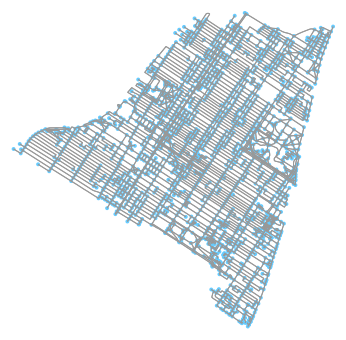

In [5]:
place_name = 'Plateau Mont Royal, Montreal, Quebec, Canada'
graph = ox.graph_from_place(place_name, network_type='walk')
fig, ax = ox.plot_graph(graph)
#fig.plot()

In [6]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

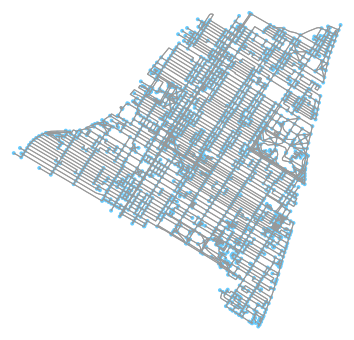

In [7]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [8]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
edges_proj.bounds.head()

,minx,miny,maxx,maxy
0,611850.343066,5.041782e+06,611891.437993,5.041848e+06
1,611828.435849,5.041748e+06,611850.343066,5.041782e+06
2,611850.343066,5.041756e+06,611893.493556,5.041782e+06
3,611811.340576,5.041782e+06,611850.343066,5.041807e+06
4,611891.437993,5.041848e+06,611939.679176,5.041925e+06


In [9]:
test= np.array(list(nodes_proj.lon))
test.min()

-73.6120455

In [10]:
test.max()

-73.5593741

In [11]:
from shapely.geometry import box
bbox = box(*edges_proj.unary_union.bounds)
bbox_edges = bbox.exterior.coords
#print(bbox)

In [13]:
inters = ox.clean_intersections(edges_proj, tolerance=15, dead_ends=False)

#test = gpd.GeoDataFrame(geometry=bbox_edges[0])



AttributeError: 'GeoDataFrame' object has no attribute 'graph'

In [14]:
gdf = gpd.GeoDataFrame(geometry='geometry')
gdf.crs = edges_proj.graph['crs']
ox.project_gdf(gdf, to_latlong=True)

ValueError: Unknown column geometry

In [15]:
orig_point = bbox.centroid
print(orig_point)

POINT (610429.7069694713 5042057.535550097)


In [16]:
nodes_proj['x'] = nodes_proj.x.astype(float)
maxx = nodes_proj['x'].max()

In [17]:
target_loc = nodes_proj.loc[nodes_proj['x']==maxx, :]
target_loc

,highway,lat,lon,osmid,x,y,geometry
209508004,NaN,45.5397,-73.5594,209508004,612472.1901,5.04391e+06,POINT (612472.1901000504 5043914.834165713)


In [18]:
target_point = target_loc.geometry.values[0]
print(target_point)

POINT (612472.1901000504 5043914.834165713)


In [19]:
orig_xy = (orig_point.y, orig_point.x)
target_xy = (target_point.y, target_point.x)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]
print(orig_node)
print(target_node)

1838981662
209508004


In [20]:
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)

In [21]:
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

In [22]:
print(route)

[1838981662, 182071333, 1849329733, 300730486, 1849329809, 1844385600, 26232418, 182070154, 5022472296, 299872784, 5022472282, 26232413, 5022472279, 1465519045, 5022472267, 26232412, 5022472271, 6188320842, 26232411, 209424775, 209424849, 209424717, 209424845, 209424768, 209424829, 209424860, 209424742, 209424892, 32585978, 209424935, 209473600, 209473604, 209473617, 209473660, 438303087, 209473754, 209473880, 209473870, 438304343, 209481429, 1280347941, 209481466, 209481470, 209481482, 209493307, 32553891, 209493488, 209493480, 209493335, 209493338, 209493361, 209493454, 209493262, 209493266, 209493291, 209508004]


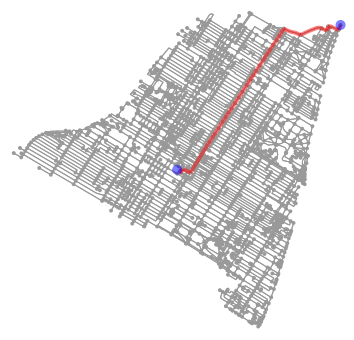

In [23]:
fig, ax = ox.plot_graph_route(graph_proj, route, origin_point=orig_xy, destination_point=target_xy)

7114

In [3]:
df_stations = pd.read_csv('../data/bixi/BixiMontrealRentals2018/Stations_2018.csv')

In [46]:
lat1,lat2 = df_stations['latitude'][[0,8]]
lon1,lon2 = df_stations['longitude'][[0,8]]

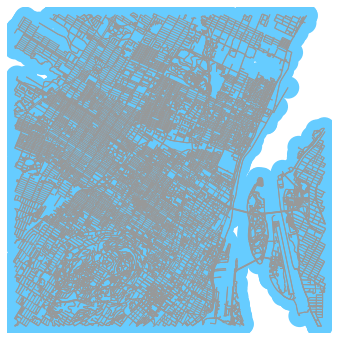

In [13]:
cf = """
     ["area"!~"yes"]
     ["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]
     ["foot"!~"no"]
     ["service"!~"private"]
     ["access"!~"private"]
     """
sg = ox.graph_from_point((lat, lon), distance=5000, custom_filter=cf)
fig, ax = ox.plot_graph(sg, node_size=500)

In [47]:
origin = ox.utils.get_nearest_node(sg, (lat1, lon1))
destination = ox.utils.get_nearest_node(sg, (lat2, lon2))
print(origin)
print(destination)
print(dir(origin))

209473864
437736342
['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


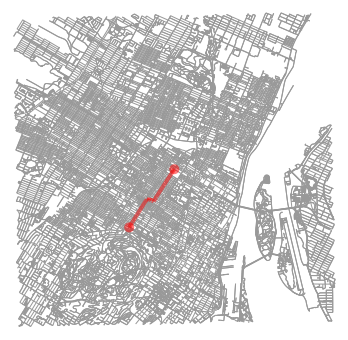

In [48]:
sg_proj = ox.project_graph(sg)
route = nx.shortest_path(sg_proj, source=origin, target=destination, weight = 'length')

fig, ax = ox.plot_graph_route(sg_proj, route, node_size=0, save=True, show=True, filename='my_first_route')

In [56]:
sg.size()
dir(sg)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 '_pred',
 '_succ',
 'add_cycle',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_path',
 'add_star',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_key_dict_factory',
 'edge_subgraph',
 'edges',
 'fresh_copy',
 'get_edge_data',
 'graph',
 'has_edge',
 'has_node',
 'has_predecessor',
 'has_successor',
 'in_degree',
 'in_edges',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',

In [49]:
G = ox.graph_from_place('Plateau Mont Royal, Montreal, Quebec, Canada', network_type='walk')

In [55]:
G.nodes

NodeView((208863235, 208863242, 208863246, 208863250, 208863257, 208863259, 208863264, 3528679461, 208863270, 208863280, 31776823, 31776824, 31776826, 31776840, 31776848, 31776849, 31776850, 31776851, 476659809, 438329450, 3638089814, 476659828, 476659830, 3638089815, 2148401275, 2148401276, 2148401277, 2148401278, 2148401279, 2148401280, 2148401281, 2148401282, 2148401283, 2148401284, 2148401285, 2148401286, 2148401287, 2148401288, 2148401289, 2148401290, 2148401291, 458940554, 476659844, 476659846, 476659847, 458940552, 458940555, 476659858, 458940563, 458940564, 458940565, 458940562, 458940566, 458940567, 458940560, 1855103136, 1855103137, 31776929, 31776930, 340156578, 1855103141, 340156577, 1855103143, 1855103145, 31776937, 3607797939, 31776949, 31776950, 31776951, 31776952, 31776953, 3642671289, 476659899, 476659900, 476659901, 476659902, 3642671288, 3586048200, 3586048202, 3586048204, 438329549, 438329552, 3567501523, 3567501524, 31776988, 31776989, 31776990, 31776991, 31776992,

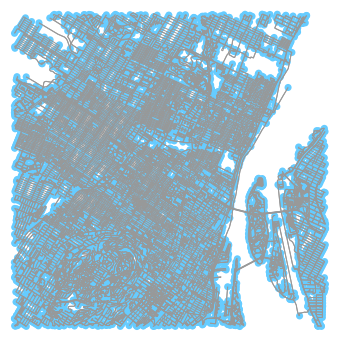

In [15]:
fig,ax = ox.plot_graph(sg,node_size=50)